In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [46]:

PlayerStats21  = "training_set/2021_player_stats.csv"
PlayerPoints21 = "training_set/2022_player_points.csv"
PlayerStats20  = "training_set/2020_player_stats.csv"
PlayerPoints20 = "training_set/2021_player_points.csv"
PlayerStats19  = "training_set/2021_player_stats.csv"
PlayerPoints19 = "training_set/2019_player_stats.csv"

#Loading in Data W/pandas
stats21 = pd.read_csv(PlayerStats21)
points21 = pd.read_csv(PlayerPoints21)
stats20 = pd.read_csv(PlayerStats21)
points20 = pd.read_csv(PlayerPoints21)
stats19 = pd.read_csv(PlayerStats21)
points19 = pd.read_csv(PlayerPoints21)
combined_stats = pd.concat([stats21, stats20, stats19])
combined_points = pd.concat([points21, points20, points19])



In [47]:
#Setting Min max Scaler transformation as way of regularization/standardization
numerical_features = [ 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP']
scaler = StandardScaler()
combined_stats[numerical_features] = scaler.fit_transform(combined_stats[numerical_features])

#Merging features and labels on player name
merged_df = pd.merge(combined_stats, combined_points, on='PLAYER')
merged_df.dropna(inplace=True)


#Dropping Names, Age, and ppg from features for training purposes
X = merged_df.drop(['PLAYER', 'PPG', 'Age'], axis=1)
y = merged_df['PPG']

#train test split creation and validation split for data separation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=42)



MAE: 0.059446149551247655, MSE: 0.17228781274340674, RMSE: 0.41507567110516935
Cross-validated RMSE: 0.4112459313780855


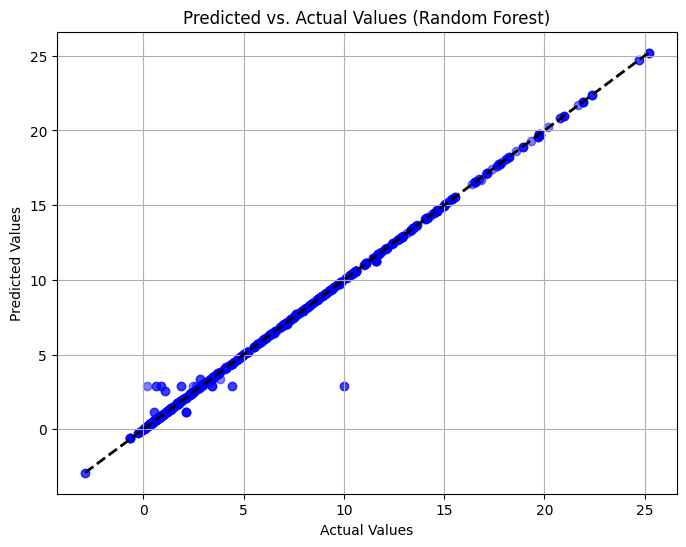

In [48]:
#Creating Baseline Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

#Running Predictions and finding Error
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

#Plotting relative error accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Random Forest)')
plt.grid(True)
plt.show()


In [49]:

#Finding best Params for Random Forest
rf_param_grid = {
    "n_estimators" : [10,20,30],
    "max_features" : ["sqrt", "log2"],
    "min_samples_split" : [2,4,8],
    "bootstrap": [True, False]
    }

gwiddy = GridSearchCV(rf_regressor,param_grid=rf_param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print(gwiddy.best_params_)



{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}


MAE: 0.050242444113090784, MSE: 0.17130633053874458, RMSE: 0.4138916893811044
Cross-validated RMSE: 0.397726111171519


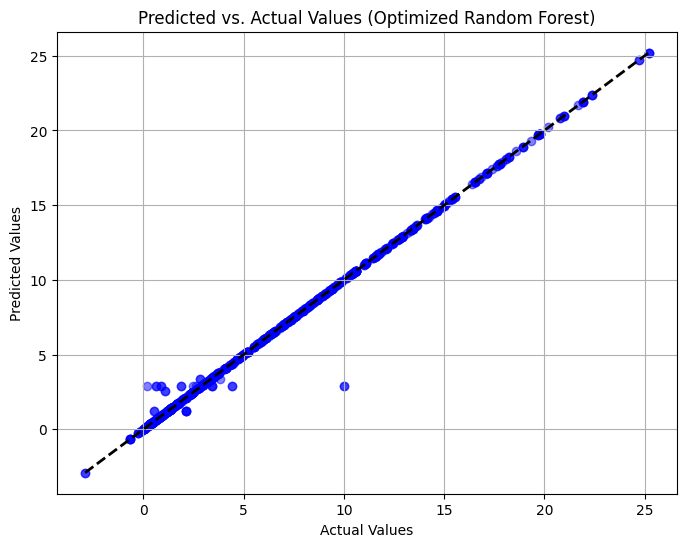

In [50]:
#Creating Better Random Forest Regressor
better_rf = RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4, n_estimators=10)

#Running Predictions and finding Error
better_rf.fit(X_train, y_train)
y_pred = better_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


# Cross-validation
cv_scores = cross_val_score(better_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')


#Plotting relative error accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Optimized Random Forest)')
plt.grid(True)
plt.show()




MAE: 0.0740038378309278, MSE: 0.172681113401794, RMSE: 0.4155491708592306
Cross-validated RMSE: 0.4038531565364904


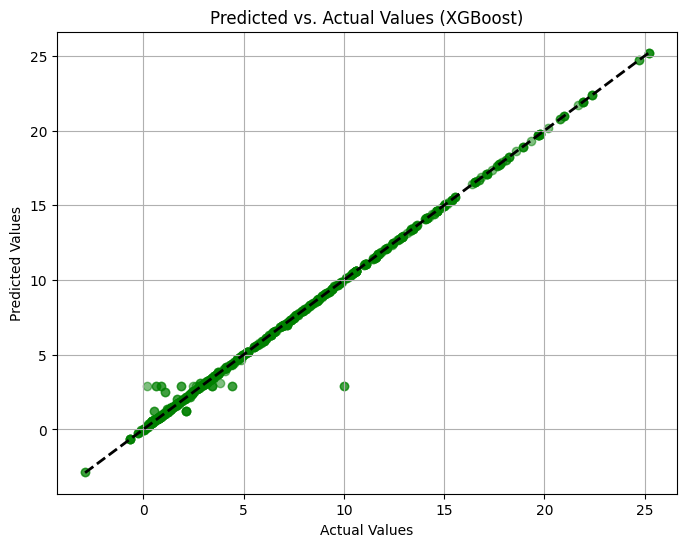

In [51]:
#Creating baseline XGB regressor
xgb_regressor = xgb.XGBRegressor()


#Running Predictions and finding Error
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')



# Cross-validation
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')


#Plotting relative error accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (XGBoost)')
plt.grid(True)
plt.show()

In [52]:

xgb_param = xgb.XGBRegressor()

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}
gwiddy = GridSearchCV(xgb_param,param_grid=xgb_param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print(gwiddy.best_params_)



{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


MAE: 0.050741985519551995, MSE: 0.17129738178684772, RMSE: 0.4138808787403058
Cross-validated RMSE: 0.3977455791608464


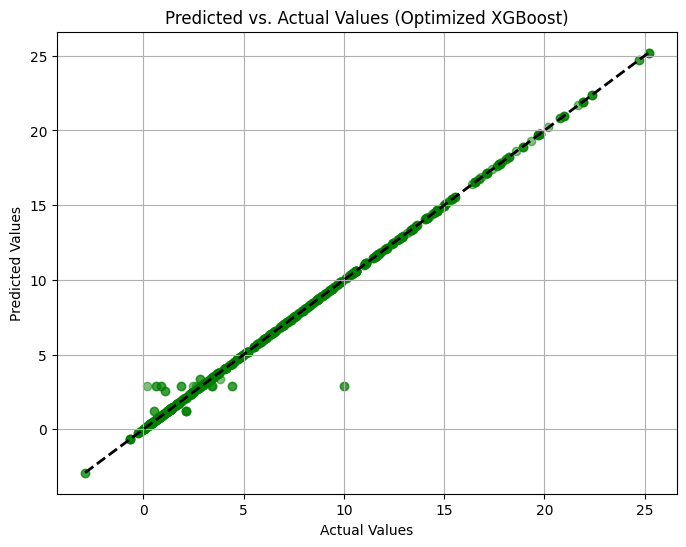

In [53]:



better_xgb = xgb.XGBRegressor(learning_rate=.2, max_depth = 7, n_estimators = 300)

better_xgb.fit(X_train, y_train)
y_pred_xgb = better_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

cv_scores = cross_val_score(better_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Optimized XGBoost)')
plt.grid(True)
plt.show()

MAE: 2.5705947540082645, MSE: 11.199352540115637, RMSE: 3.3465433719161086


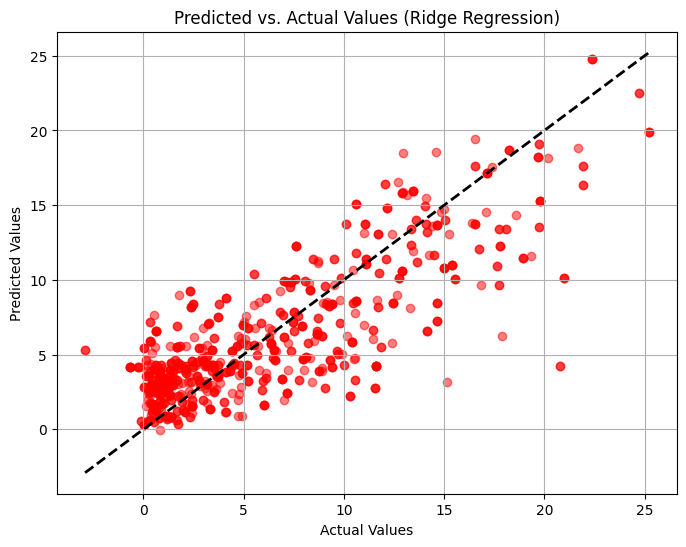

In [54]:

# Creating Ridge Model
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

# Getting Ridge Predictions
y_pred_ridge = ridge_regressor.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plotting predicted vs. actual values for Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Ridge Regression)')
plt.grid(True)
plt.show()



In [55]:

Ridge_param = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
}
gwiddy = GridSearchCV(Ridge_param,param_grid= param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print(gwiddy.best_params_)



{'alpha': 0.1}


MAE: 2.568481636773248, MSE: 11.190762813157962, RMSE: 3.3452597527184587


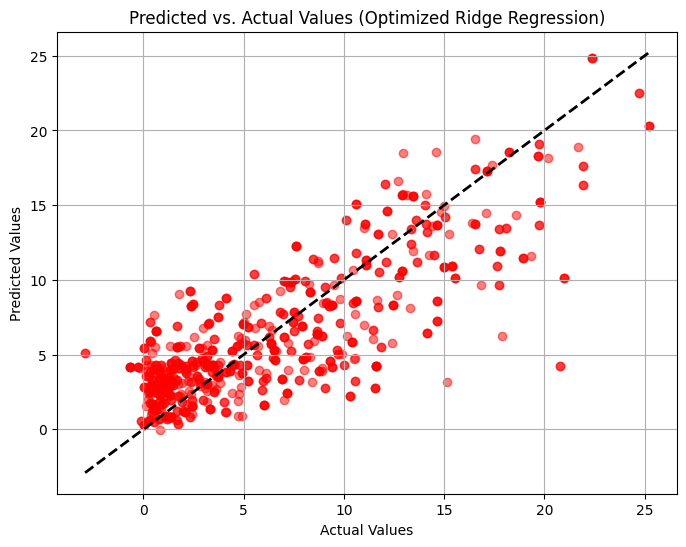

In [56]:
# Creating Ridge Model
better_ridge_regressor = Ridge(alpha=.01)
better_ridge_regressor.fit(X_train, y_train)

# Getting Ridge Predictions
y_pred_ridge = better_ridge_regressor.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plotting predicted vs. actual values for Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Optimized Ridge Regression)')
plt.grid(True)
plt.show()

MAE: 2.8571190320396185, MSE: 15.916017063907585, RMSE: 3.989488321064192


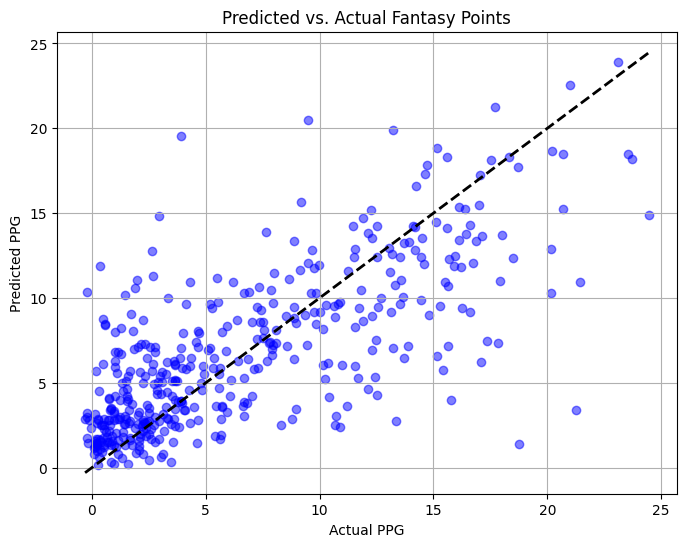

In [57]:
test_players_stats = "test_set/2022_player_stats.csv"
test_players_labels = "test_set/2023_player_points.csv"
stats22 = pd.read_csv(test_players_stats)
points22 = pd.read_csv(test_players_labels)
stats22[numerical_features] = scaler.fit_transform(stats22[numerical_features])




test_merged_df = pd.merge(stats22, points22, on='PLAYER')
test_merged_df.dropna(inplace=True)


#Dropping Names, Age, and ppg from features for training purposes
X = test_merged_df.drop(['PLAYER', 'PPG', 'Age'], axis=1)
y_23 = test_merged_df['PPG']

y_pred_23 = better_rf.predict(X)

mae_ridge = mean_absolute_error(y_23, y_pred_23)
mae = mean_absolute_error(y_23, y_pred_23)
mse = mean_squared_error(y_23, y_pred_23)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_23, y_pred_23, color='blue', alpha=0.5)
plt.plot([y_23.min(), y_23.max()], [y_23.min(), y_23.max()], 'k--', lw=2)
plt.xlabel('Actual PPG')
plt.ylabel('Predicted PPG')
plt.title('Predicted vs. Actual Fantasy Points')
plt.grid(True)
plt.show()

In [58]:
test_players_stats = "test_set/2022_player_stats.csv"
test_players_labels = "test_set/2023_player_points.csv"
stats22 = pd.read_csv(test_players_stats)
points22 = pd.read_csv(test_players_labels)

player_name = 'Josh Allen'
stat_column = 'PPG'




stat_value = points22.loc[points22['PLAYER'] == player_name, stat_column].values[0]
pookiePoints = points22[points22['PLAYER'] == 'Josh Allen']
pookiePoints = pookiePoints.drop(["PLAYER"], axis=1)
Pookie= stats22[stats22['PLAYER'] == 'Josh Allen']
Pookie = Pookie.drop(["PLAYER", 'Age'], axis=1)
y_pred = better_rf.predict(Pookie)
print("Josh Allen")
print(f"prediction: {y_pred} ")
print(f"Actual: {stat_value}")



Josh Allen
prediction: [23.998125] 
Actual: 23.094117647058823
